In [2]:
import sys; sys.path.append("../../")
import pandas as pd
import matplotlib.pyplot as plt
from DataPreprocessing.DataPreprocessing import *
from utils import *
from CorrelationAnalysis import *
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze Installs


## Question 1
    Is there certain app category have highest installs? does category affect installs? 

## Read Data

In [3]:
# read data as dataframe from csv file
df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
print(df.shape)

C:\Users\dell\AppData\Local\Temp\ipykernel_20976\377713779.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../../Dataset/Preprocessed_data.csv', error_bad_lines=False)
b'Skipping line 78700: expected 20 fields, saw 21\nSkipping line 85033: expected 20 fields, saw 21\n'
b'Skipping line 128092: expected 20 fields, saw 22\n'
b'Skipping line 197000: expected 20 fields, saw 21\nSkipping line 218421: expected 20 fields, saw 21\n'
b'Skipping line 330474: expected 20 fields, saw 21\nSkipping line 337681: expected 20 fields, saw 21\n'
b'Skipping line 556266: expected 20 fields, saw 21\n'
b'Skipping line 641092: expected 20 fields, saw 21\n'
b'Skipping line 759119: expected 20 fields, saw 21\n'
b'Skipping line 801997: expected 20 fields, saw 22\n'
b'Skipping line 823248: expected 20 fields, saw 21\n'
b'Skipping line 1044981: expected 20 fields, saw 21\n'
b'Skipping line 1138871: e

(1900333, 20)


In [4]:
df.head()


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0.0,10000000,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0.0,2.9000000,5.0 and up,Webserveis,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0.0,3.7000000,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0.0,1.8000000,4.0.3 and up,Climate Smart Tech2,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0,100+,100,478,True,0.0,6.2000000,4.1 and up,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


## Clean

In [5]:
df = convert_to_numeric(df)
df=convert_binary(df)
df.head(10)

../..\DataPreprocessing\DataPreprocessing.py:223: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
../..\DataPreprocessing\DataPreprocessing.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace('True', '1')
../..\DataPreprocessing\DataPreprocessing.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
193862,Wesbr Foundation,lungu.aubry.wesbrfoundation2,Productivity,0.0,0,10.0,10,17,1,0.0,20.000000,4.1,Wesbr Foundation,info@wesbrfoundation.org,"Jul 18, 2018","Jul 18, 2018",Everyone,0,0,0
1159482,Poly Puzzler,com.RecursiveStudios.PolyPuzzler,Casual,0.0,0,10.0,10,14,1,0.0,18.000000,4.1,Recursive Studios,recursivestudiosgames@gmail.com,"Aug 23, 2017","Aug 23, 2017",Everyone,0,0,0
1188756,Animal Sounds For Kids - Learn about Animals,com.freefeather.animalsound.sounds.music.animal,Education,5.0,44,500.0,500,540,1,0.0,25.000000,4.1,Free feather,free.feather07@gmail.com,"Sep 19, 2019","Sep 24, 2019",Everyone,1,0,0
909950,godo Delivery Management,driversapp.gododelivery.com,Business,2.3,6,100.0,100,408,1,0.0,0.000009,4.0.3,Proaims IOT Solutions,info@proaims.com,"Jun 26, 2018","Apr 17, 2019",Everyone,0,0,0
1884722,MOTORRAD NEWS,com.pressmatrix.motorradnews,News & Magazines,3.8,40,5000.0,5000,5199,1,0.0,67.000000,5.0,Syburger Verlag GmbH,developer@syburger.de,"Jan 20, 2017","May 05, 2020",Everyone,0,1,0
970657,Persyst Mobile,com.persyst.persystmobileuniversal,Medical,0.0,0,10.0,10,10,1,0.0,0.000008,5.0,Persyst,support@persyst.com,"Mar 11, 2021","Mar 15, 2021",Everyone,0,0,0
1383564,City Night Light Wallpapers,com.walpapapers.NightCityWallpapers,Personalization,0.0,0,10.0,10,47,1,0.0,12.000000,4.4,Kang Indra,irawanindra859@gmail.com,"Jan 10, 2018","Apr 07, 2020",Everyone,1,0,0
1113459,Click2code - get Software and Key,com.click2code.click2code,Productivity,3.1,17,500.0,500,840,1,0.0,0.000006,5.0,Nilkanth Pawan,pawankumar9576@gmail.com,"Dec 25, 2019","May 09, 2020",Teen,1,0,0
1194062,China News,com.chinanewspapers,News & Magazines,4.8,5,500.0,500,501,1,0.0,0.000004,4.1,JpCrow,cuervojuanpablo@gmail.com,"Oct 14, 2019","Dec 18, 2020",Everyone 10+,1,0,0
1828142,AWTour,demo.com.awtour,Travel & Local,5.0,15,10.0,10,46,1,0.0,0.000003,5.0,Simone Farenza,patrizia.bo59@gmail.com,"Jul 26, 2019","Jul 31, 2019",Everyone,0,0,0


In [6]:
df_cat_avg_installs = df.groupby(['Category'], group_keys=True).apply(lambda x: x)
df_cat_avg_installs.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
193862,Wesbr Foundation,lungu.aubry.wesbrfoundation2,Productivity,0.0,0,10.0,10,17,1,0.0,20.000000,4.1,Wesbr Foundation,info@wesbrfoundation.org,"Jul 18, 2018","Jul 18, 2018",Everyone,0,0,0
1159482,Poly Puzzler,com.RecursiveStudios.PolyPuzzler,Casual,0.0,0,10.0,10,14,1,0.0,18.000000,4.1,Recursive Studios,recursivestudiosgames@gmail.com,"Aug 23, 2017","Aug 23, 2017",Everyone,0,0,0
1188756,Animal Sounds For Kids - Learn about Animals,com.freefeather.animalsound.sounds.music.animal,Education,5.0,44,500.0,500,540,1,0.0,25.000000,4.1,Free feather,free.feather07@gmail.com,"Sep 19, 2019","Sep 24, 2019",Everyone,1,0,0
909950,godo Delivery Management,driversapp.gododelivery.com,Business,2.3,6,100.0,100,408,1,0.0,0.000009,4.0.3,Proaims IOT Solutions,info@proaims.com,"Jun 26, 2018","Apr 17, 2019",Everyone,0,0,0
1884722,MOTORRAD NEWS,com.pressmatrix.motorradnews,News & Magazines,3.8,40,5000.0,5000,5199,1,0.0,67.000000,5.0,Syburger Verlag GmbH,developer@syburger.de,"Jan 20, 2017","May 05, 2020",Everyone,0,1,0


In [7]:

Installs = df.Installs.mean()

df_cat_avg_installs = df.groupby(['Category'])['Installs'].mean()

df_cat_avg_installs.head()

Category
Action             1525.430990
Adventure          1851.960049
Arcade              995.514085
Art & Design       1788.135922
Auto & Vehicles    1486.985392
Name: Installs, dtype: float64

## Select Interesting  Variables

In [8]:
features_df = df[[ 'Installs', 'Size', 'Category','Minimum Android']]
print(features_df.shape)

(285048, 4)


In [9]:
features_df.head(10)

,Installs,Size,Category,Minimum Android
193862,10.0,20.000000,Productivity,4.1
1159482,10.0,18.000000,Casual,4.1
1188756,500.0,25.000000,Education,4.1
909950,100.0,0.000009,Business,4.0.3
1884722,5000.0,67.000000,News & Magazines,5.0
970657,10.0,0.000008,Medical,5.0
1383564,10.0,12.000000,Personalization,4.4
1113459,500.0,0.000006,Productivity,5.0
1194062,500.0,0.000004,News & Magazines,4.1
1828142,10.0,0.000003,Travel & Local,5.0


## Installs values distribution
   

Text(0.5, 1.0, 'Average Installs per Category')

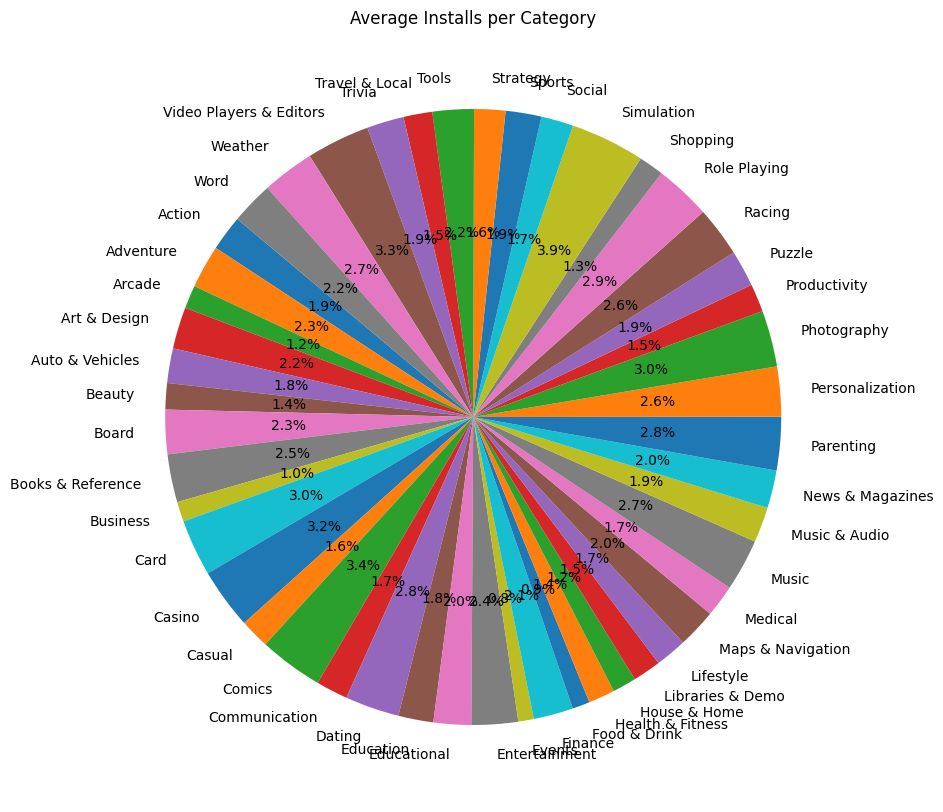

In [10]:
# plot pie chart for installs values
plt.figure(figsize=(10,10))
plt.pie(df_cat_avg_installs, labels=df_cat_avg_installs.index, autopct='%1.1f%%',  startangle=140)
plt.title('Average Installs per Category')


<Axes: xlabel='Category'>

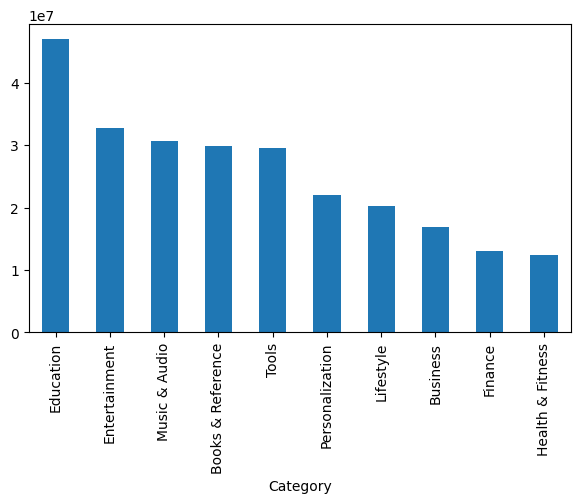

In [11]:
#get unique values of content rating
df_cat_avg_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
df_cat_avg_installs.nlargest(15).plot(kind='bar', figsize=(7, 4))

### Results:
    there's no significance difference between average number of installs
    for each category

### Mean of app installs for ad supported/ not supported

Text(0, 0.5, 'Installs')

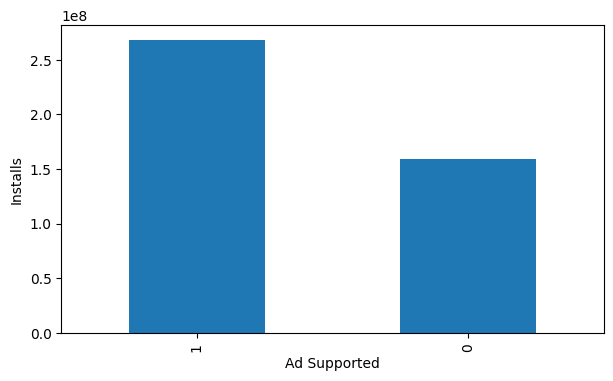

In [12]:
#get unique values of content rating
app_rating = df.groupby('Ad Supported')['Installs'].sum().sort_values(ascending=False).head(10)
app_rating.nlargest(15).plot(kind='bar', figsize=(7, 4))
plt.ylabel('Installs')


In [13]:
ANOVA_test(df, 'Ad Supported', 'Rating')

P-value:  0.0


0.0

## Question 2
    Is there a relation between size and installs?

Text(0, 0.5, 'Installs')

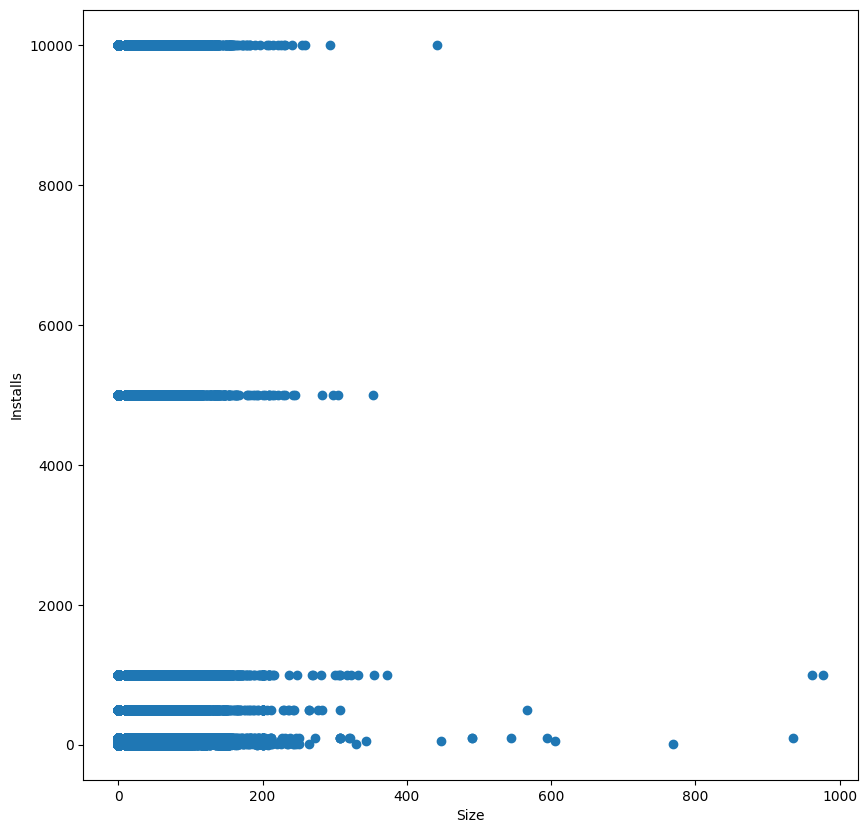

In [14]:
#scatter size vs installs
plt.figure(figsize=(10,10))
plt.scatter(df['Size'], df['Installs'])
plt.xlabel('Size')
plt.ylabel('Installs')



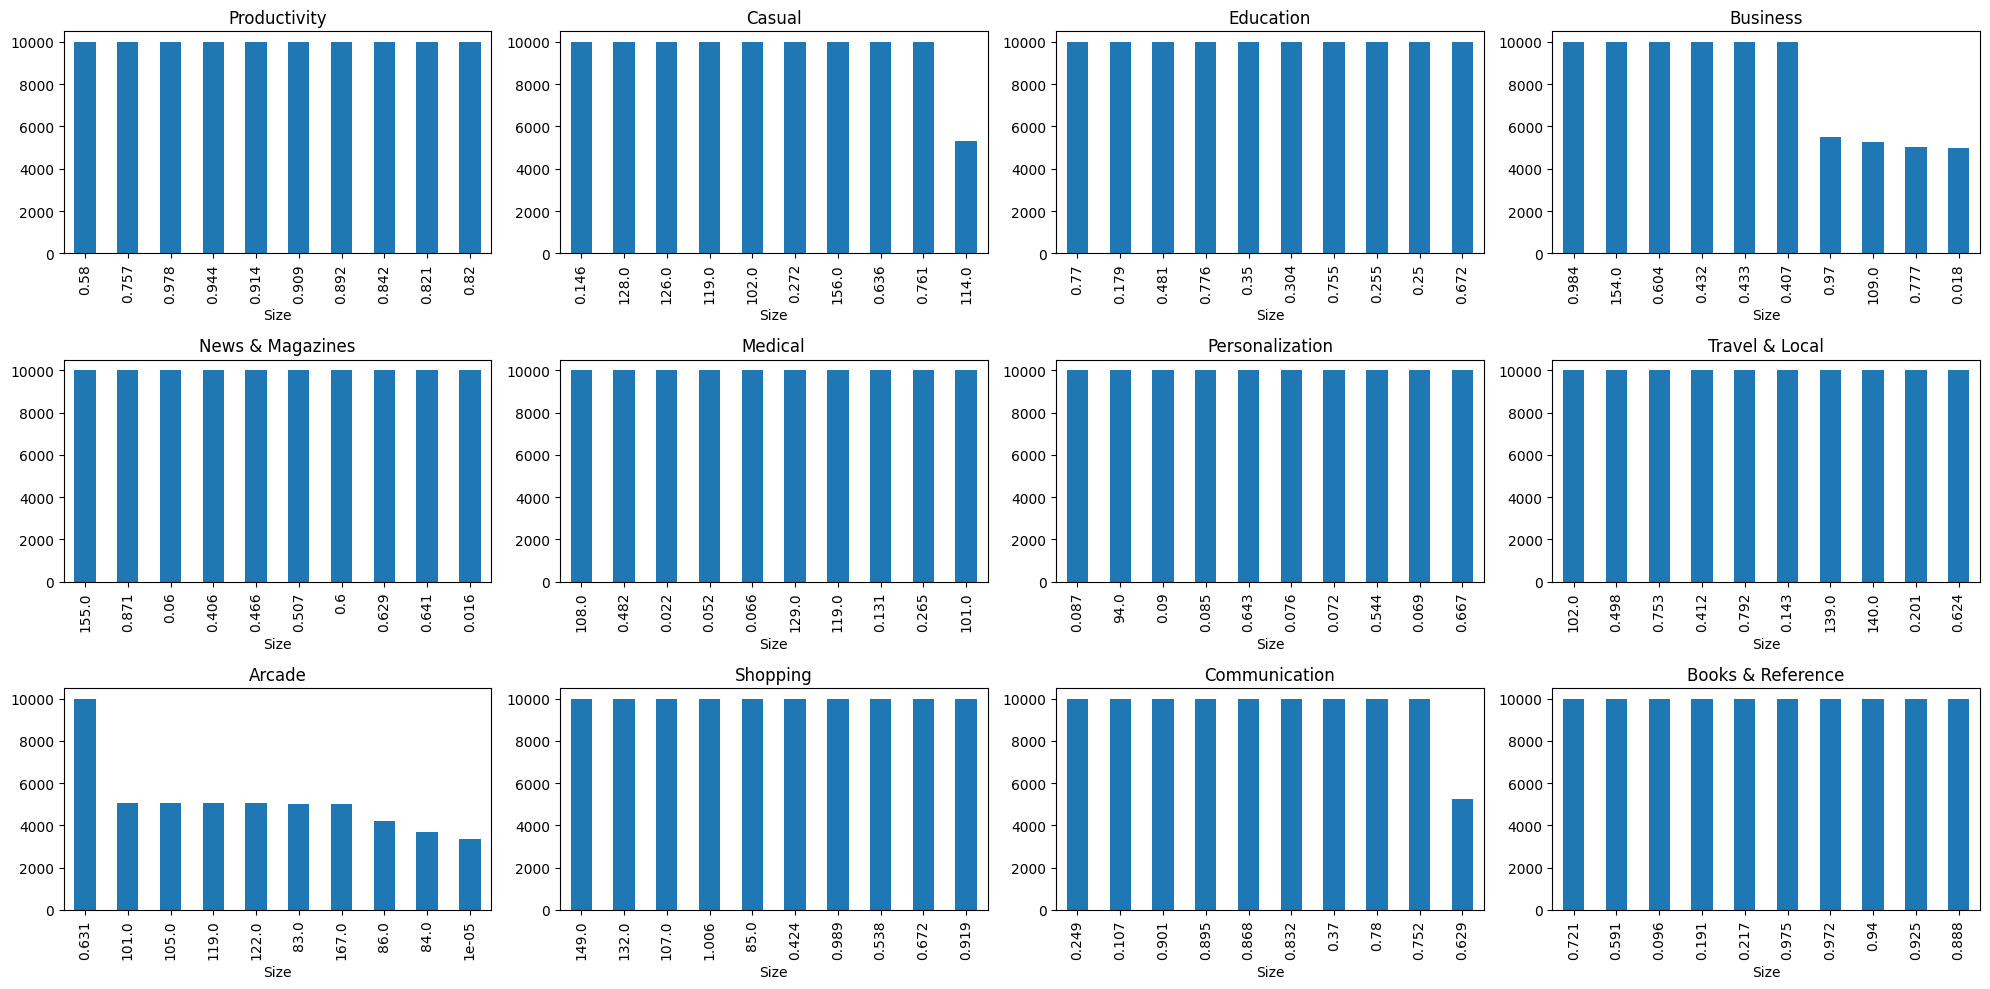

In [15]:
sub_blot(df, "Category", "Size", "Installs", "Mean Ratings by Last Updated for each category")

## Question 3
    Is there a relation between install and minimum android version?

## Results

In [16]:
# print unique values of Minimum Android
# combine version based on first two digits
df['Minimum Android'] = df['Minimum Android'].str[:3]
print("Unique values in Minimum Android: ", df['Minimum Android'].unique())
#p

Unique values in Minimum Android:  ['4.1' '4.0' '5.0' '4.4' '2.3' '2.1' '4.2' '6.0' '5.1' '8.0' '4.3' '7.0'
 '2.2' '3.2' '2.0' '1.6' '1.5' '3.0' '1.0' '0.0' '7.1' '3.1' '1.1']


In [17]:
#print number of unique values in  column Minimum Android
print("Number of unique values in Minimum Android: ", df['Minimum Android'].nunique())
#convert Minimum Android to numeric
df['Minimum Android'] = pd.to_numeric(df['Minimum Android'], errors='coerce')

Number of unique values in Minimum Android:  23


<Axes: xlabel='Minimum Android'>

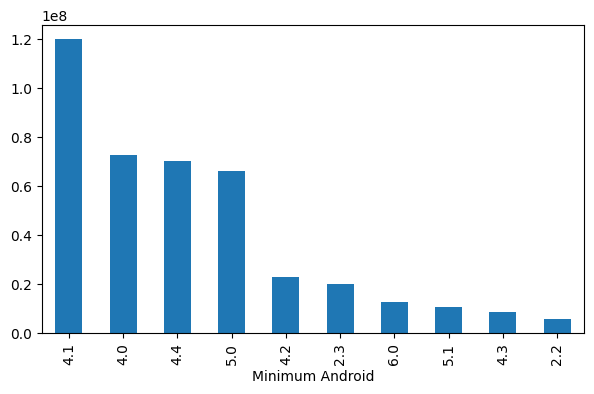

In [18]:
content_rating = df.groupby('Minimum Android')['Installs'].sum().sort_values(ascending=False).head(10)
content_rating.nlargest(15).plot(kind='bar', figsize=(7, 4))



### Test

## Results
- apps that support medium android version that available for majority of users
  had the highest number of installs.
- so company may consider a reasonable android version when launching new app to 
  guarantee high number of installs
